In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('predictions/pred_0.png', cv2.IMREAD_GRAYSCALE)
imgnotGray = cv2.imread('predictions/pred_0.png')
height = np.size(img, 0)
width = np.size(img, 1)

In [3]:
window_name = 'image'
cv2.imshow('checkinput', img)
#cv2.imwrite('results/checkinput.png', img)
cv2.waitKey(0) 
#closing all open windows 
cv2.destroyAllWindows()

In [29]:
kernel_1 =np.array ( [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      
                     ])

kernel_1 = kernel_1.astype('uint8')

dilation_1 = cv2.dilate(img, kernel_1)
dilation_1 = cv2.dilate(dilation_1, kernel_1)
dilation_1 = cv2.dilate(dilation_1, kernel_1)
dilation_1 = cv2.dilate(dilation_1, kernel_1)


dilation_1 = cv2.erode(dilation_1, kernel_1)
dilation_1 = cv2.erode(dilation_1, kernel_1)
dilation_1 = cv2.erode(dilation_1, kernel_1)
dilation_1 = cv2.erode(dilation_1, kernel_1)

cv2.imshow('checkinput', img)
cv2.imshow('dilation_1', dilation_1)
cv2.waitKey(0) 
cv2.destroyAllWindows()

median = cv2.medianBlur(dilation_1, 5)
median = cv2.medianBlur(median, 5)
cv2.imshow('checkinput', img)
cv2.imshow('medianblurred', median)
cv2.waitKey(0) 
cv2.destroyAllWindows()

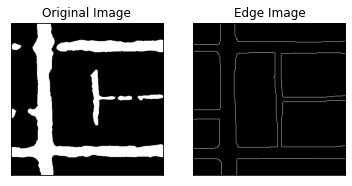

In [30]:
# Canny edge detection
edges = cv2.Canny(dilation_1,100,200)
cv2.imshow('checkinput', img)
cv2.imshow('dilation_1', dilation_1)
cv2.imshow('edges', edges)
cv2.waitKey(0) 
cv2.destroyAllWindows()

cv2.waitKey(0) 
cv2.destroyAllWindows()
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

#cv2.imwrite('results/Edge.png', edges)

In [ ]:
#lines = cv2.HoughLinesP(edges, rho=2, theta=np.pi/180, threshold=100, minLineLength=20, maxLineGap=5)


In [31]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 10 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20  # minimum number of pixels making up a line
max_line_gap = 5  # maximum gap in pixels between connectable line segments

line_image = np.copy(dilation_1) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
lines_edges = cv2.addWeighted(dilation_1, 0.8, line_image, 1, 0)
cv2.imshow('checkinput', img)
cv2.imshow('road lines', lines_edges)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [ ]:
#https://towardsdatascience.com/a-deep-dive-into-lane-detection-with-hough-transform-8f90fdd1322f